### Importing Packaging Liberaries

In [79]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("pastel")

### Importing Data

In [11]:
df = pd.read_csv("HR_Analytics.csv")
df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


### Data Cleaning 

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Rename Columns
df = df.rename(columns={'MonthlyIncome': 'Salary'})
df = df.rename(columns={'PerformanceRating': 'Performance_Rating'})

# Save Clean Data
df.to_csv("Cleaned_HR_Analytics_Data.csv",index=False)

### Sampling From Dataset

In [10]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")
# Simple Random Sampling: select 15% of all employees
sample_random = df.sample(frac=0.15, random_state=42)

print("Random sample shape:", sample_random.shape)
sample_random.head()

Random sample shape: (222, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
661,RM057,35,26-35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,...,4,80,1,9,3,2,9,8,1,8.0
274,RM344,29,26-35,No,Travel_Rarely,144,Sales,10,1,Marketing,...,1,80,2,7,2,3,7,7,1,7.0
394,RM133,31,26-35,Yes,Travel_Rarely,542,Sales,20,3,Life Sciences,...,3,80,1,4,2,3,2,2,2,2.0
218,RM290,28,26-35,No,Travel_Rarely,1117,Research & Development,8,2,Life Sciences,...,4,80,0,5,3,3,5,3,0,2.0
922,RM527,39,36-45,No,Travel_Rarely,408,Research & Development,2,4,Technical Degree,...,1,80,0,20,4,3,20,7,11,10.0


In [ ]:
# Stratified Sampling: keep department proportions
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

sample_stratified = (
    df.groupby("Department", group_keys=False)
      .apply(lambda x: x.sample(frac=0.15, random_state=42))
)

print("Stratified sample shape:", sample_stratified.shape)
sample_stratified['Department'].value_counts(normalize=True)   # check proportions


Stratified sample shape: (222, 38)


C:\Users\Seyar\AppData\Local\Temp\ipykernel_12028\2001746229.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.15, random_state=42))


Department
Research & Development    0.653153
Sales                     0.306306
Human Resources           0.040541
Name: proportion, dtype: float64

In [ ]:
# Sort by EmployeeNumber (or by index) to keep a consistent order
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

df_sorted = df.sort_values(by="EmployeeNumber")   # use correct ID column name
sample_systematic = df_sorted.iloc[::7, :]

print("Systematic sample shape:", sample_systematic.shape)
sample_systematic.head()


Systematic sample shape: (212, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1013,RM001,41,36-45,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5.0
329,RM008,30,26-35,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,...,2,80,1,1,2,3,1,0,0,NaN
212,RM015,28,26-35,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,...,2,80,0,6,4,3,4,2,0,3.0
735,RM022,36,36-45,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,...,2,80,0,10,4,3,5,3,0,3.0
1131,RM029,44,36-45,No,Travel_Rarely,477,Research & Development,7,4,Medical,...,4,80,1,24,4,3,22,6,5,NaN


In [ ]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

# Full-population mean
mean_population = df['Salary'].mean()

# Means of each sample
mean_random      = sample_random['Salary'].mean()
mean_stratified  = sample_stratified['Salary'].mean()
mean_systematic  = sample_systematic['Salary'].mean()

print("Mean salary – full population :", round(mean_population,2))
print("Mean salary – random sample    :", round(mean_random,2))
print("Mean salary – stratified sample:", round(mean_stratified,2))
print("Mean salary – systematic sample:", round(mean_systematic,2))


Mean salary – full population : 6504.99
Mean salary – random sample    : 6603.0
Mean salary – stratified sample: 6671.13
Mean salary – systematic sample: 6692.85


## Central Tendency

### Calculate mean, median, and mode for Monthly_Income


In [ ]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

# Mean of Salary
Mean_Salary = np.mean(df['Salary'])
print("Mean of the Salary ",round(Mean_Salary,2))

# Median of Salary
Median_Salary = np.median(df['Salary'])
print("Median of the Salary ",round(Median_Salary,2))


#Mode of Salary
from scipy import stats

mode_Salary = stats.mode(df['Salary'],keepdims=True)
print("Mode:", mode_Salary.mode[:])
print("Frequency:", mode_Salary.count[0])



Mean of the Salary  6504.99
Median of the Salary  4933.0
Mode: [2342]
Frequency: 4


#### Calculate mean, median, and mode for Age.


In [8]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")
df

# Calculation of Mean
Mean_Age = np.mean(df['Age'])
print("Mean Of the Age",round(Mean_Age,2))


# Calculation of Median
Median_Age = np.median(df['Age'])
print("Median Of the Age",(Median_Age))


# Calculation of Mood 
Mode_Age = stats.mode(df['Age'],keepdims=True)
print("Mode Of the Age",Mode_Age.mode[:])

Mean Of the Age 36.92
Median Of the Age 36.0
Mode Of the Age [34]


#### Calculate mean, median, and mode for PerformanceRating.

In [9]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")


# Calculation of Mean
Mean_PerformanceRating = np.mean(df['Performance_Rating'])
print("Mean Of the ",round(Mean_PerformanceRating,2))


# Calculation of Median
Median_Performance = np.median(df['Performance_Rating'])
print(round(Median_Performance,2))


# Calculation of Mood 
Mode_PerformanceRating = stats.mode(df['Performance_Rating'],keepdims=True)
print(Mode_Age.mode[:])

Mean Of the  3.15
3.0
[34]


### Compare mean vs. median salaries – interpret if the distribution is skewed.


In [10]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")


# Calculate mean and median
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()

print("Mean salary:", round(mean_salary, 2))
print("Median salary:", round(median_salary, 2))

# Interpret skewness
if mean_salary > median_salary:
    print("The distribution is RIGHT-SKEWED (positively skewed) – a few high salaries raise the mean.")
elif mean_salary < median_salary:
    print("The distribution is LEFT-SKEWED (negatively skewed) – a few low salaries lower the mean.")
else:
    print("The distribution is approximately SYMMETRIC.")


Mean salary: 6504.99
Median salary: 4933.0
The distribution is RIGHT-SKEWED (positively skewed) – a few high salaries raise the mean.


### Find the department with the highest median MonthlyIncome.

In [11]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

# Median MonthlyIncome by department
dept_median_income = df.groupby('Department')['Salary'].median()

print("\nMedian MonthlyIncome by Department:")
print(dept_median_income)

# Department with the highest median MonthlyIncome
highest_median_dept = dept_median_income.idxmax()
highest_median_value = dept_median_income.max()

print(f"\nDepartment with highest median MonthlyIncome: {highest_median_dept} "
    f"with a median income of {highest_median_value}")



Median MonthlyIncome by Department:
Department
Human Resources           3886.0
Research & Development    4377.0
Sales                     5754.5
Name: Salary, dtype: float64

Department with highest median MonthlyIncome: Sales with a median income of 5754.5


## Measures of Dispersion

### Calculate the range, variance, standard deviation, and IQR of MonthlyIncome.`

In [ ]:
df = pd.read_csv("Cleaned_HR_Analytics_Data.csv")

# Range
range_salary = df['Salary'].max() - df['Salary'].min()


# Variance
variance_salary = np.var(df['Salary'],ddof=1)
# print(round(variance_income,2))

# Standard Deviation
standard_deviation_salary = np.std(df['Salary'])
# print(round(standard_deviation_salary,2))

# IQR 
Q1_salary = np.percentile(df['Salary'], 25)
Q3_salary = np.percentile(df['Salary'], 75)
IQR_salary = Q3_salary - Q1_salary



print("MonthlyIncome Dispersion:")
print(f"Range: {round(range_salary, 2)}")
print(f"Variance: {round(variance_salary, 2)}")
print(f"Standard Deviation: {round(standard_deviation_salary, 2)}")
print(f"IQR: {round(IQR_salary, 2)}")

MonthlyIncome Dispersion:
Range: 18990
Variance: 22092457.22
Standard Deviation: 4698.67
IQR: 5461.5


### Calculate the range, variance, standard deviation, and IQR of Age.

In [58]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

# Range
range_age = np.max(df['Age']) - np.min(df['Age'])

# Variance
variance_age = np.var(df['Age'],ddof=1)

# Standard Deviations
standard_deviation_age = np.std(df['Age'],ddof=1)

# IQR
Q3_age = np.percentile(df['Age'],75)
Q1_age = np.percentile(df['Age'],25) 
IQR_age = Q3_age - Q1_age 



print("Age Dispersion:")
print(f"Range: {round(range_age, 2)}")
print(f"Variance: {round(variance_age, 2)}")
print(f"Standard Deviation: {round(standard_deviation_age, 2)}")
print(f"IQR: {round(IQR_age, 2)}")

Age Dispersion:
Range: 42
Variance: 83.33
Standard Deviation: 9.13
IQR: 13.0


### Calculate the range, variance, standard deviation, and IQR of PerformanceRating.

In [61]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

range_perf = df['Performance_Rating'].max() - df['Performance_Rating'].min()
variance_perf = np.var(df['Performance_Rating'], ddof=1)
std_perf = np.std(df['Performance_Rating'], ddof=1)
Q1_perf = np.percentile(df['Performance_Rating'], 25)
Q3_perf = np.percentile(df['Performance_Rating'], 75)
IQR_perf = Q3_perf - Q1_perf

print("\nPerformance Rating Dispersion:")
print(f"Range: {range_perf}")
print(f"Variance: {round(variance_perf, 2)}")
print(f"Standard Deviation: {round(std_perf, 2)}")
print(f"IQR: {IQR_perf}")



Performance Rating Dispersion:
Range: 1
Variance: 0.13
Standard Deviation: 0.36
IQR: 0.0


### Department with Highest Salary Dispersion

In [73]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

dept_dispersion = df.groupby('Department')['Salary'].std()

print("\nStandard Deviation of Salary by Department:")
print(round(dept_dispersion,2))

highest_disp_dept = dept_dispersion.idxmax()
highest_disp_value = dept_dispersion.max()

print(f"\nDepartment with highest salary dispersion: {highest_disp_dept}")
print(f"Standard Deviation in that department: {round(highest_disp_value, 2)}")


Standard Deviation of Salary by Department:
Department
Human Resources           5788.73
Research & Development    4885.98
Sales                     4056.92
Name: Salary, dtype: float64

Department with highest salary dispersion: Human Resources
Standard Deviation in that department: 5788.73


### Compare Salary Dispersion (Male vs Female)

In [74]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

Compare_Salary = df.groupby('Gender')['Salary'].std()

print("Salary Standard Deviation by Gender:")
print(Compare_Salary)


if Compare_Salary['Male'] > Compare_Salary['Female']:
    print("Male employees show higher salary dispersion ")
elif Compare_Salary['Male'] < Compare_Salary['Female']:
    print("Female employees show higher salary dispersion ")
else:
    print("→ Salary dispersion is equal between genders.")


Salary Standard Deviation by Gender:
Gender
Female    4692.84198
Male      4704.03793
Name: Salary, dtype: float64
Male employees show higher salary dispersion 


In [76]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

dept_stats = df.groupby('Department')['Salary'].agg(['mean', 'std'])
dept_stats['CV (%)'] = (dept_stats['std'] / dept_stats['mean']) * 100

print("\nCoefficient of Variation (CV) of MonthlyIncome by Department:")
print(dept_stats)

highest_cv_dept = dept_stats['CV (%)'].idxmax()
print(f"\nDepartment with highest Coefficient of Variation: {highest_cv_dept}")



Coefficient of Variation (CV) of MonthlyIncome by Department:
                               mean          std     CV (%)
Department                                                 
Human Resources         6654.507937  5788.732921  86.989646
Research & Development  6280.365047  4885.976523  77.797652
Sales                   6966.737778  4056.923050  58.232751

Department with highest Coefficient of Variation: Human Resources


## Visual Analysis

### Salary Distribution

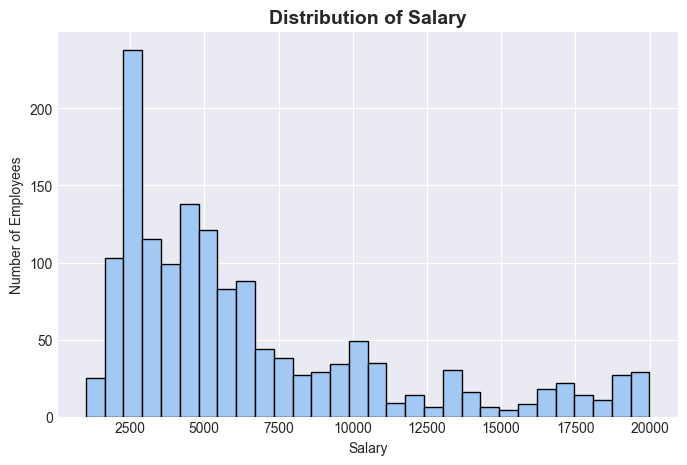

In [ ]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')


plt.figure(figsize=(8,5))
plt.hist(df['Salary'], bins=30, edgecolor='black')
plt.title('Distribution of Salary', fontsize=14, weight='bold')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.savefig("Visuals/Distribution of Salary.png")
plt.show()

### Salary by Department

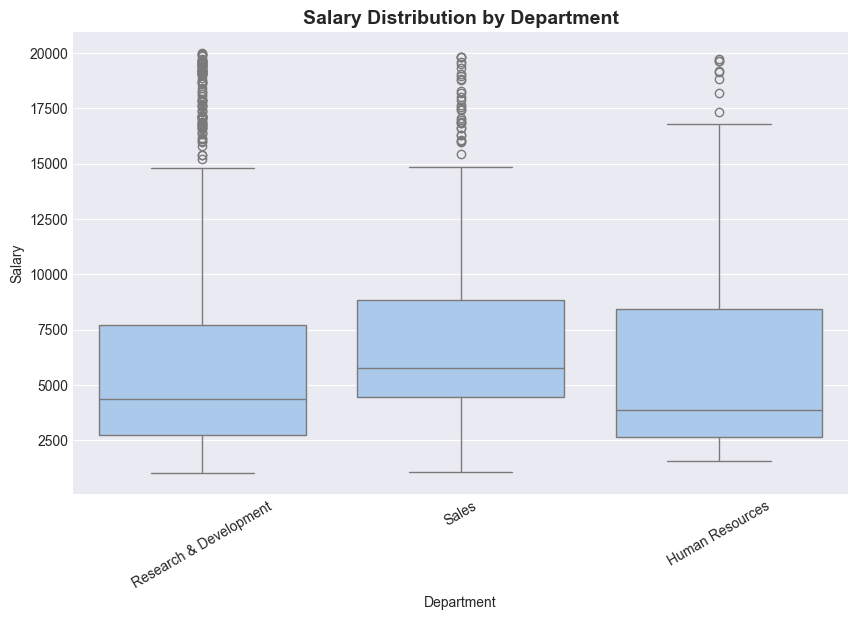

In [ ]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department', fontsize=14, weight='bold')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=30)
plt.savefig("Visuals/Salary by Department.png") 
plt.show()



### Mean Salary by Department

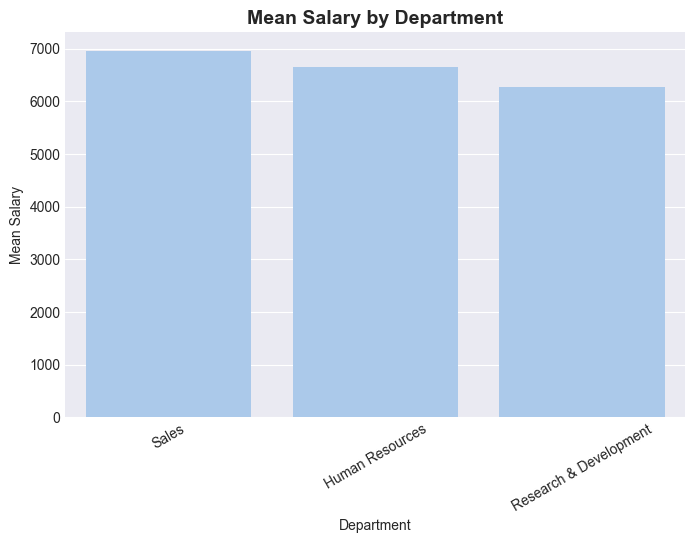

In [ ]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

dept_mean_salary = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=dept_mean_salary.index, y=dept_mean_salary.values)
plt.title('Mean Salary by Department', fontsize=14, weight='bold')
plt.xlabel('Department')
plt.ylabel('Mean Salary')
plt.xticks(rotation=30)
plt.savefig("Visuals/Mean Salary by Department.png") 
plt.show()


### Age vs Salary

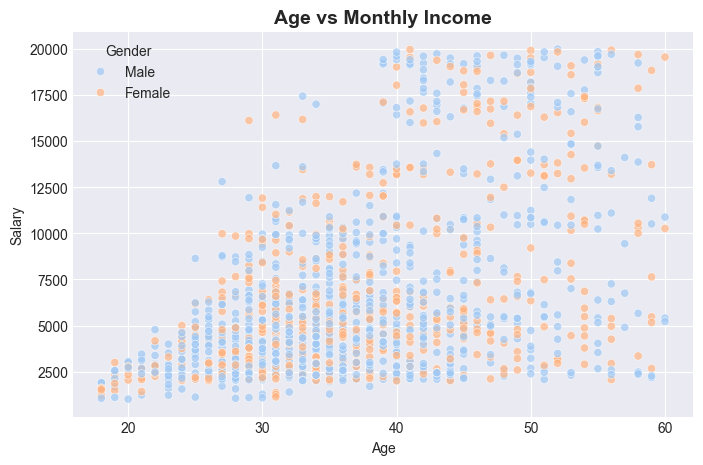

In [94]:
df = pd.read_csv('Cleaned_HR_Analytics_Data.csv')

plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Gender', alpha=0.7)
plt.title('Age vs Monthly Income', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Gender')
plt.savefig("Visuals/Age VS Salary.png") 
plt.show()
